In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_test.shape

(10000, 1)

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

#### y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [9]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
y_test = y_test.reshape(-1,)

In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [12]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

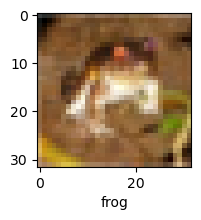

In [13]:
plot_sample(X_train,y_train,0)

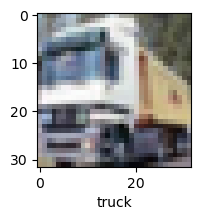

In [14]:
plot_sample(X_train,y_train,1)

#### Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [15]:
X_train = X_train / 255.0
X_test = X_test / 255.0

#### Build simple artificial neural network for image classification

In [16]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

c:\Users\Kalyan\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 28ms/step - accuracy: 0.3045 - loss: 1.9280
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.4200 - loss: 1.6390
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.4521 - loss: 1.5513
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.4730 - loss: 1.4964
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.4968 - loss: 1.4286


In [17]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.52      0.63      0.57      1000
           1       0.72      0.42      0.53      1000
           2       0.41      0.32      0.36      1000
           3       0.39      0.09      0.14      1000
           4       0.44      0.37      0.40      1000
           5       0.29      0.62      0.40      1000
           6       0.61      0.38      0.46      1000
           7       0.48      0.61      0.53      1000
           8       0.63      0.61      0.62      1000
           9       0.48      0.68      0.56      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.46     10000
weighted avg       0.50      0.47      0.46     10000



#### Now let us build a convolutional neural network to train our images


In [18]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

c:\Users\Kalyan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
cnn.fit(X_train, y_train, epochs=5)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.3867 - loss: 1.6953
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6046 - loss: 1.1312
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6551 - loss: 0.9869
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6961 - loss: 0.8784
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7216 - loss: 0.8101


#### With CNN, at the end 5 epochs, accuracy was at around 70%+ which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features



In [21]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6910 - loss: 0.9053


[0.916466474533081, 0.6890000104904175]

In [22]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[3.9193593e-03, 1.1233405e-04, 7.3215761e-04, 9.1973037e-01,
        1.9699901e-04, 5.9720300e-02, 3.5853120e-03, 6.6329550e-04,
        1.0164925e-02, 1.1749555e-03],
       [6.5742016e-02, 4.0747684e-01, 2.5278679e-05, 1.0381001e-05,
        1.5253997e-06, 6.6171609e-08, 3.2148216e-07, 2.2686365e-07,
        5.2574176e-01, 1.0016570e-03],
       [8.3152190e-02, 5.7246733e-01, 6.1696153e-03, 7.5409282e-03,
        6.9230110e-03, 1.7183669e-03, 1.6137362e-03, 3.2917736e-03,
        2.9564553e-01, 2.1477517e-02],
       [5.9903675e-01, 1.6442561e-01, 8.1232935e-03, 4.0291511e-03,
        3.5567908e-03, 7.0373630e-06, 3.9459113e-04, 3.9995539e-05,
        2.1949406e-01, 8.9270476e-04],
       [1.6484619e-05, 6.5726585e-05, 1.9477447e-02, 2.1264359e-02,
        6.7382991e-01, 1.4617548e-02, 2.7046150e-01, 4.1201434e-05,
        2.2034041e-04, 5.5403916e-06]], dtype=float32)

In [23]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 4]

In [24]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

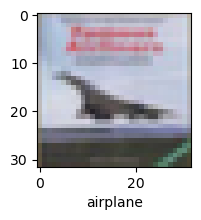

In [25]:
plot_sample(X_test, y_test,3)

In [27]:
classes[y_classes[3]]

'airplane'

In [28]:
classes[y_classes[3]]

'airplane'